In [292]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
# load data files into dataframe / Importing datasets
transaction_df = pd.read_csv('C:/Users/purva/Documents/Fetch_data_analysis_excercise/data/TRANSACTION.csv')
users_df = pd.read_csv('C:/Users/purva/Documents/Fetch_data_analysis_excercise/data/USER.csv')
product_df = pd.read_csv('C:/Users/purva/Documents/Fetch_data_analysis_excercise/data/PRODUCTS.csv')

## Exploratory Data Analysis

In [297]:
# checking the dimensions of the dataset
print("Transaction dataframe dimension:",transaction_df.shape)
print("Users dataframe dimension:",users_df.shape)
print("Product dataframe dimension:",product_df.shape)

Transaction dataframe dimension: (50000, 8)
Users dataframe dimension: (100000, 6)
Product dataframe dimension: (845552, 7)


In [299]:
# display the first few rows of the dataframe
transaction_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [301]:
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [303]:
product_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


## Analyzing the data quality issues within the dataset

### 1. Data format issue
By extracting the information for dataframes we will be able to understand the index, column names, data types, non-null values and memory usage. After extracting the information it is noticed the data type format is inconsistent for all tables it is classifying most of the columns as object data type.

In [307]:
# get information on the dataframe including datatypes and missing value
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [309]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [311]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


### 2. Missing value in tables
It is important to deal with the missing values within the table as they can significantly impact our analysis if not handled

In [314]:
# display the sum of null / missing values for each column in dataframe
transaction_df.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

In [316]:
users_df.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [318]:
product_df.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

### 3. Data inconsistency issue

#### a) FINAL_SALE column has leading spaces for missing rows which is leading to inconsistency, there are around 12500 rows with leading spaces

In [322]:
# identify total number leading and trailing spaces
rows_with_spaces = transaction_df[transaction_df['FINAL_SALE'].str.strip() == '']
print("Indexes of rows with spaces:", len(rows_with_spaces.index.tolist()))

Indexes of rows with spaces: 12500


#### b) There are strings present in FINAL_QUANTITY column which has float values, the string is generating inconsistency

In [325]:
# Identify non-numeric values in the FINAL_QUANTITY column
unique_non_numeric_values = transaction_df[~transaction_df['FINAL_QUANTITY'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['FINAL_QUANTITY'].unique()
# Display rows with non-numeric values
print(unique_non_numeric_values)

['zero']


#### c) The GENDER column has inconsistent data, below we can see the there are duplicate genders present due to format issues

In [328]:
# identify unique values in gender column
unique_genders = users_df['GENDER'].unique()
unique_genders

array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

### 4. Duplicate rows in dataset

In [331]:
# identifying total number of duplicate rows in each dataframe
product_duplicates = product_df.duplicated().sum()
transactions_duplicates = transaction_df.duplicated().sum()
users_duplicates = users_df.duplicated().sum()
print(product_duplicates)
print(transactions_duplicates)
print(users_duplicates)

215
171
0


### 5. Primary key and Foreign keys in dataset

#### a) In Users table, ID column is assumed to be primary key as below we can see there no duplicates present for this column

In [335]:
# dentifying total number of duplicate user ids
ID_duplicate_rows = users_df[users_df['ID'].duplicated(keep=False)]['ID'].unique()
num_duplicate_id = len(ID_duplicate_rows)
print("Number of Duplicate ID:", num_duplicate_id)

Number of Duplicate ID: 0


#### b) In Transaction table receipt_ID was supposed to be the primary key, but as below we can see there are duplicates present for that column. Other than receipt_ID there are no columns present that can identify each transaction made uniquely and to be classified as primary key 

In [338]:
# identifying total number of duplicate receipt ids
receipt_ID_duplicate_rows = transaction_df[transaction_df['RECEIPT_ID'].duplicated(keep=False)]['RECEIPT_ID'].unique()
num_duplicate_receipt = len(receipt_ID_duplicate_rows)
print("Number of Duplicate RECEIPT_ID:", num_duplicate_receipt)

Number of Duplicate RECEIPT_ID: 24440


#### c) Assuming for Product table the combination of category 1 + category 2 + category 3 is primary key, as no other column can classified as a immediate primary key. But after combining those columns it was noticed that even the combination as duplicates, so product table should contain a column where each product is identifed uniquely and primary can be classified

In [369]:
# Create a new column combining the categories
product_df['Category_combined'] = product_df['CATEGORY_1'] + '_' + product_df['CATEGORY_2'] + '_' + product_df['CATEGORY_3']

# Find duplicate combinations
duplicate_rows = product_df[product_df['Category_combined'].duplicated(keep=False)]
# Print duplicate combinations
print("Duplicate combinations found:")
print(len(duplicate_rows))

Duplicate combinations found:
845496


In [375]:
product_df = product_df.drop('Category_combined', axis=1)

#### d) Foreign key analysis: The user table and transaction table has one to many relationship, the USER_ID in User table should have all entries that the ID of user in transaction table has. It was found that not all users present in Transaction table exist in User table

In [343]:
unmatched_user_ids_count = transaction_df[~transaction_df['USER_ID'].isin(users_df['ID'])].shape[0]
unmatched_user_ids_count

49738

#### e) The product table and transaction table has one to many relationship, the Barcode in Product table should have all entries that the Barcode in Transaction table has. It was found that not all barcodes in transactions table exist in the product table

In [346]:
unmatched_barcodes = transaction_df[~transaction_df['BARCODE'].isin(product_df['BARCODE'])].shape[0]
unmatched_barcodes

19408

## Handling Data quality issues

### 1. Handling missing data

In [221]:
# Replace null values with "Unknown" for users and product table
users_df['GENDER'] = users_df['GENDER'].fillna("unknown") 
users_df['STATE'] = users_df['STATE'].fillna("unknown") 
users_df['LANGUAGE'] = users_df['LANGUAGE'].fillna("unknown") 

#products table
product_df['CATEGORY_1'] = product_df['CATEGORY_1'].fillna("unknown") 
product_df['CATEGORY_2'] = product_df['CATEGORY_2'].fillna("unknown") 
product_df['CATEGORY_3'] = product_df['CATEGORY_3'].fillna("unknown") 
product_df['MANUFACTURER'] = product_df['MANUFACTURER'].fillna("unknown") 
product_df['BRAND'] = product_df['BRAND'].fillna("unknown") 

### 2. Handling duplicates

In [224]:
# dropping duplicates for product and transaction table
product_df = product_df.drop_duplicates() 
transaction_df = transaction_df.drop_duplicates() 

### 3. Handling data inconsistency

In [227]:
# Remove leading and trailing spaces
transaction_df['FINAL_SALE'] = transaction_df['FINAL_SALE'].str.strip()
transaction_df

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [229]:
# transform all gender values to lowercase to avoid duplicates
users_df['GENDER'] = users_df['GENDER'].str.lower().str.strip()
# replace '-' or '_' with space to deal with duplicate values
users_df['GENDER'] = users_df['GENDER'].str.replace('_', ' ')
users_df['GENDER'] = users_df['GENDER'].str.replace('-', ' ')
# display unique genders to check if the duplicate are removed
unique_genders_no_duplicates = users_df['GENDER'].unique()
unique_genders_no_duplicates

array(['female', 'unknown', 'male', 'non binary', 'transgender',
       'prefer not to say', 'not listed', 'not specified',
       "my gender isn't listed"], dtype=object)

In [231]:
# replace "zero" string with 0 value 
transaction_df['FINAL_QUANTITY'] = transaction_df['FINAL_QUANTITY'].str.replace('zero', '0')
# display unique quantity to check if the zero string is removed
unique_quantity = transaction_df['FINAL_QUANTITY'].unique()
unique_quantity

array(['1.00', '0', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

In [233]:
# replace null value for final sale column with 0
transaction_df['FINAL_SALE'] = transaction_df['FINAL_SALE'].fillna(0) 

In [235]:
# replace null value for barcode in transaction and product table with 0
transaction_df['BARCODE'] = transaction_df['BARCODE'].fillna(0) 
product_df['BARCODE'] = product_df['BARCODE'].fillna(0) 

### 4. Handling Data format issue

In [250]:
# converting the transaction table columns to appropriate data type 
transaction_df['RECEIPT_ID'] = transaction_df['RECEIPT_ID'].astype(pd.StringDtype())
transaction_df['PURCHASE_DATE'] = pd.to_datetime(transaction_df['PURCHASE_DATE']) 
transaction_df['SCAN_DATE'] = pd.to_datetime(transaction_df['SCAN_DATE']) 
transaction_df['STORE_NAME'] = transaction_df['STORE_NAME'].astype(pd.StringDtype())
transaction_df['USER_ID'] = transaction_df['USER_ID'].astype(pd.StringDtype())
transaction_df['BARCODE'] = transaction_df['BARCODE'].astype('int64')
transaction_df['FINAL_QUANTITY'] = pd.to_numeric(transaction_df['FINAL_QUANTITY'])
transaction_df['FINAL_SALE'] = pd.to_numeric(transaction_df['FINAL_SALE'])

# converting the user table columns to appropriate data type 
users_df['ID'] = users_df['ID'].astype(pd.StringDtype())
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE']) 
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE']) 
users_df['STATE'] = users_df['STATE'].astype(pd.StringDtype())
users_df['LANGUAGE'] = users_df['LANGUAGE'].astype(pd.StringDtype())
users_df['GENDER'] = users_df['GENDER'].astype(pd.StringDtype())

# converting the product table columns to appropriate data type 
product_df['CATEGORY_1'] = product_df['CATEGORY_1'].astype(pd.StringDtype())
product_df['CATEGORY_2'] = product_df['CATEGORY_2'].astype(pd.StringDtype())
product_df['CATEGORY_3'] = product_df['CATEGORY_3'].astype(pd.StringDtype())
product_df['CATEGORY_4'] = product_df['CATEGORY_4'].astype(pd.StringDtype())
product_df['MANUFACTURER'] = product_df['MANUFACTURER'].astype(pd.StringDtype())
product_df['BRAND'] = product_df['BRAND'].astype(pd.StringDtype())
product_df['BARCODE'] = product_df['BARCODE'].astype('int64')


In [252]:
# display info to check the conversion is done properly for all columns
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      49829 non-null  string             
 1   PURCHASE_DATE   49829 non-null  datetime64[ns]     
 2   SCAN_DATE       49829 non-null  datetime64[ns, UTC]
 3   STORE_NAME      49829 non-null  string             
 4   USER_ID         49829 non-null  string             
 5   BARCODE         49829 non-null  int64              
 6   FINAL_QUANTITY  49829 non-null  float64            
 7   FINAL_SALE      37343 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(1), string(3)
memory usage: 3.4 MB


In [254]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  string             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         100000 non-null  string             
 4   LANGUAGE      100000 non-null  string             
 5   GENDER        100000 non-null  string             
dtypes: datetime64[ns, UTC](2), string(4)
memory usage: 4.6 MB


In [256]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    845337 non-null  string
 1   CATEGORY_2    845337 non-null  string
 2   CATEGORY_3    845337 non-null  string
 3   CATEGORY_4    67453 non-null   string
 4   MANUFACTURER  845337 non-null  string
 5   BRAND         845337 non-null  string
 6   BARCODE       845337 non-null  int64 
dtypes: int64(1), string(6)
memory usage: 51.6 MB


## Data visulalization

### Univariate analysis is performed to identify patterns within the dataset

#### Below we can see the gender distribution, where it was found female are the top users. State wise the top ranking users are from Texas, Florida, California states. Most language spoke by this users is English.

In [172]:
# Univariate Analysis: Users Table

def plot_users_table(data):
    # GENDER Distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x='GENDER')
    plt.title('GENDER Distribution')
    plt.show()

    # STATE Distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, y='STATE', order=data['STATE'].value_counts().index)
    plt.title('STATE Distribution')
    plt.show()

    # LANGUAGE Distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x='LANGUAGE')
    plt.title('LANGUAGE Distribution')
    plt.show()

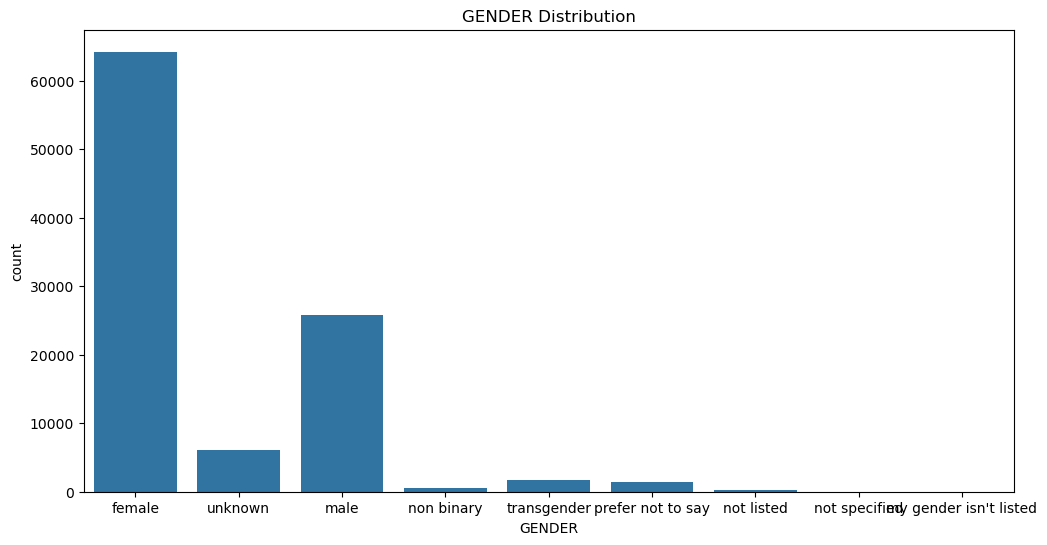

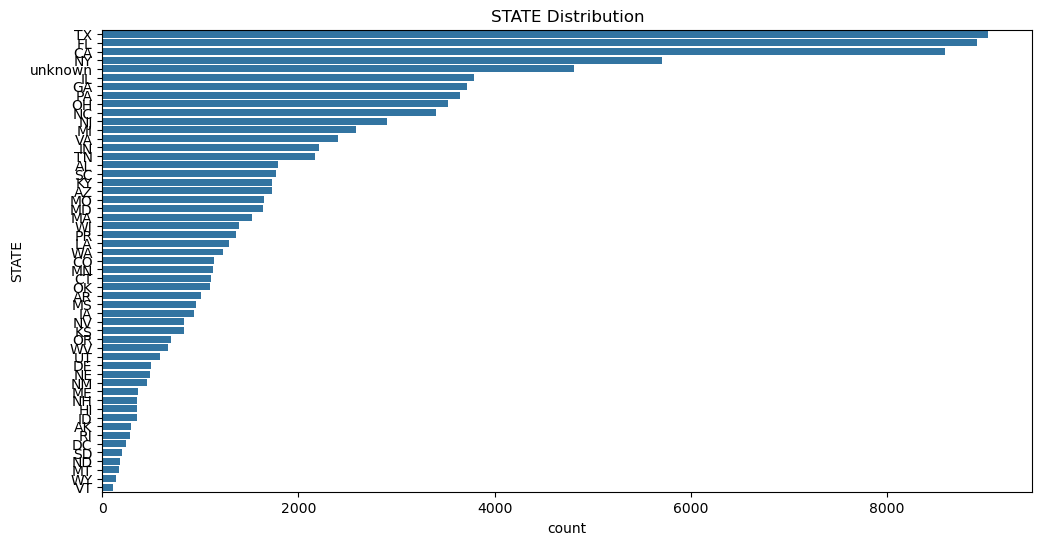

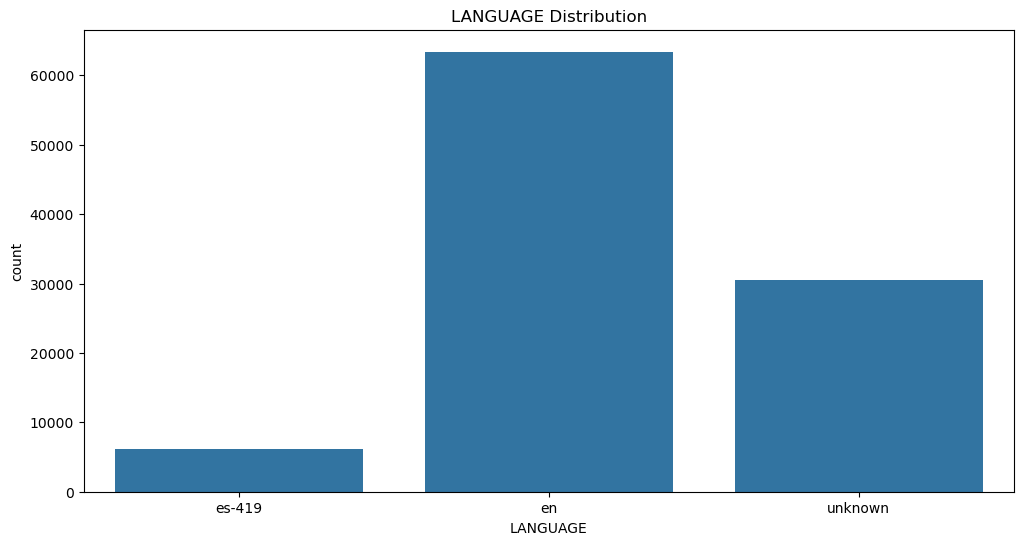

In [174]:
plot_users_table(users_df)

#### We can take note that top 5 stores where the receipts are scanned at high rates or transactions are performed at high volume is from Walmart, Dollar General Store, ALDI, Target, Kroger.

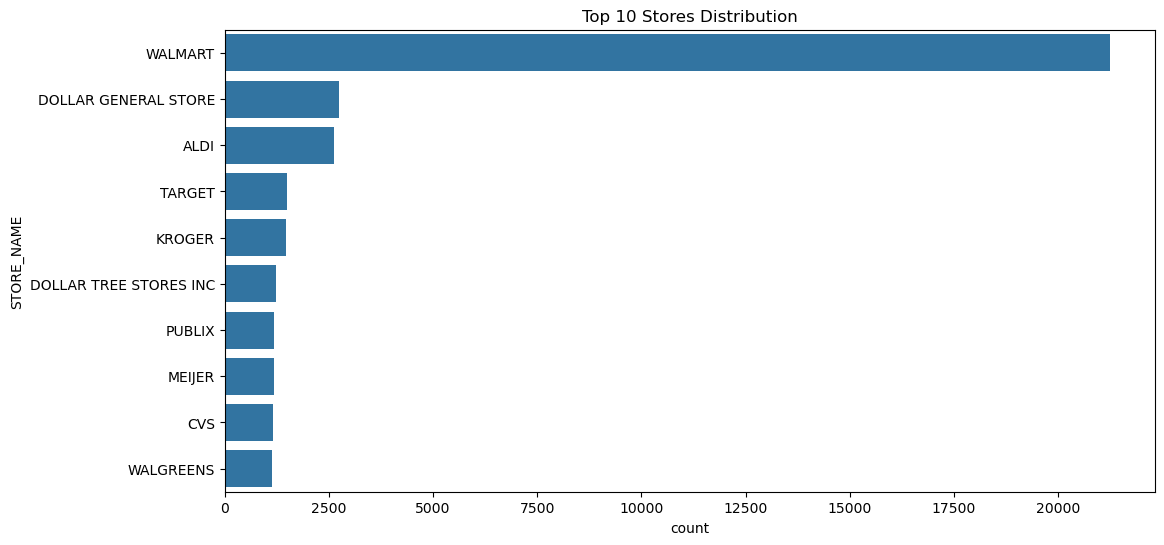

In [175]:
# Univariate Analysis: Transaction Table

# Get the top 10 stores
top_10_stores = transaction_df['STORE_NAME'].value_counts().nlargest(10).index.tolist()

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=transaction_df, y='STORE_NAME', order=top_10_stores)
plt.title('Top 10 Stores Distribution')
plt.show()


#### The top 3 product for category 1 belong to Health & Wellness, Snacks and Beverages. For category 2 the top 3 product belong to Candy, Haircare and Medicines & Treatments. Lastly top brands are REM BRAND, PRIVATE LABEL AND CVS. Brand not known is not classified properly into its appropriate brand so we cannot consider this category as top. 

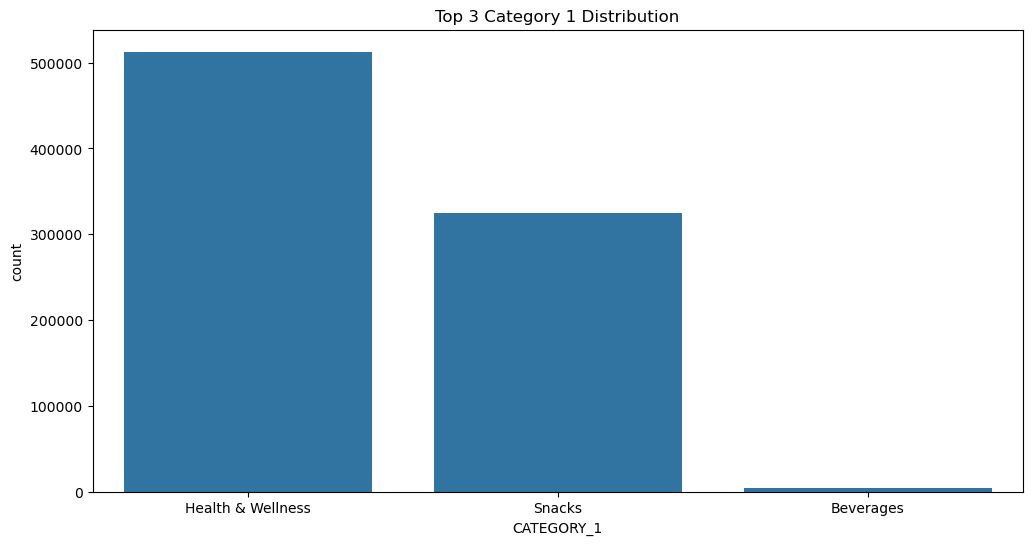

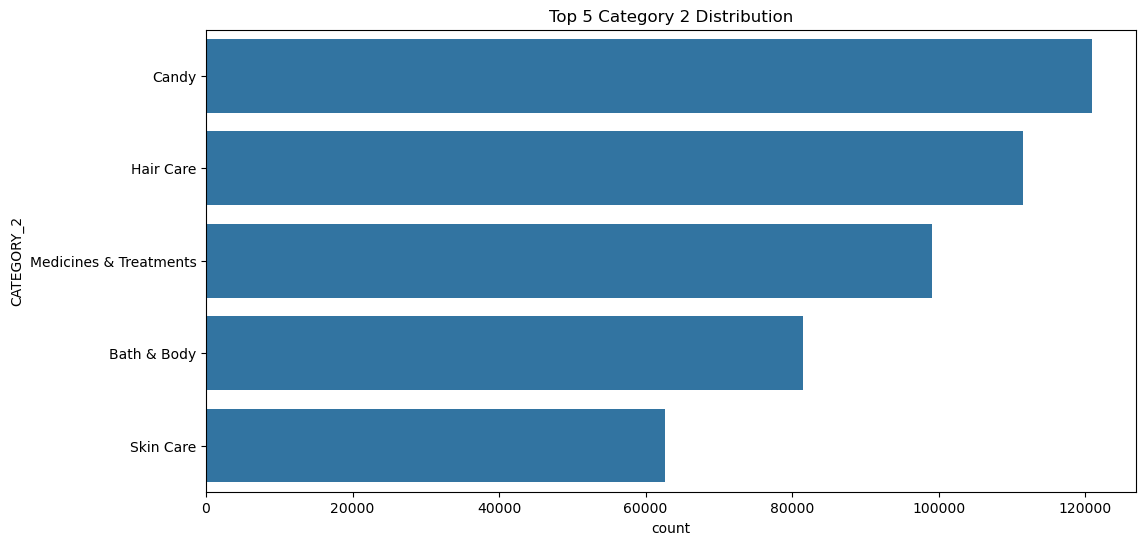

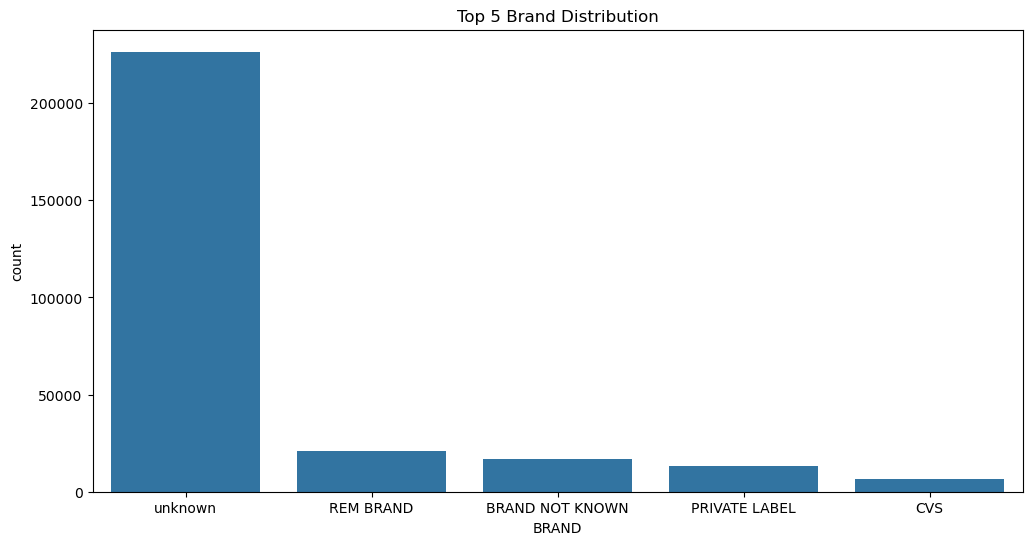

In [178]:
# Univariate Analysis: Product Table

# Get the top 3 category 1
top_3_category_1 = product_df['CATEGORY_1'].value_counts().nlargest(3).index.tolist()
# Get the top 5 category 2
top_5_category_2 = product_df['CATEGORY_2'].value_counts().nlargest(5).index.tolist()
# Get the top 5 brands
top_5_brands = product_df['BRAND'].value_counts().nlargest(5).index.tolist()


def plot_product_table(data):
    # Category 1 Distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=product_df, x='CATEGORY_1', order=top_3_category_1)
    plt.title('Top 3 Category 1 Distribution')
    plt.show()

    # Category 2 Distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=product_df, y='CATEGORY_2', order=top_5_category_2)
    plt.title('Top 5 Category 2 Distribution')
    plt.show()

    # Brand Distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=product_df, x='BRAND', order=top_5_brands)
    plt.title('Top 5 Brand Distribution')
    plt.show()
plot_product_table(product_df)

#### Here the Age column is calcuated, and in the formula it is divided by 365.25 because though a year typically has 365 days, but there are leap years that have 366 days. To account for the slight variation in the length of a year, the value 365.25 is used. This considers the average length of a year, including leap years.

In [82]:
# Calculate age
users_df['AGE'] = (pd.Timestamp.now(tz="UTC") - users_df['BIRTH_DATE']).dt.days // 365.25
# replace 0 for null values in age column
users_df['AGE'] = users_df['AGE'].fillna(0) 
# convert the datatype to integer
users_df['AGE'] = users_df['AGE'].astype('int64')

### Creating csv files to load in sql

In [95]:
# load the cleaned dataframes to csv files
product_df.to_csv('Product.csv',index=False,header=True)
users_df.to_csv('User.csv',index=False,header=True)
transaction_df.to_csv('Transaction.csv',index=False,header=True)